<ipython-input-3-d072ac427870>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forums_sentiment_df, x="BERT Sentiment", order=["POSITIVE", "NEUTRAL", "NEGATIVE"],


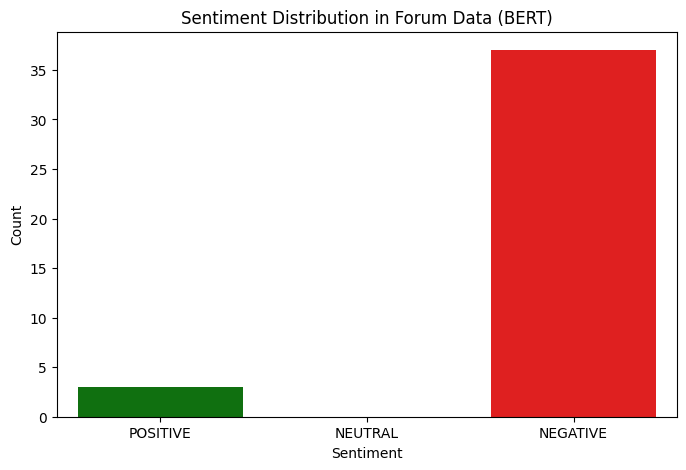

<ipython-input-3-d072ac427870>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tweets_sentiment_df, x="BERT Sentiment", order=["POSITIVE", "NEUTRAL", "NEGATIVE"],


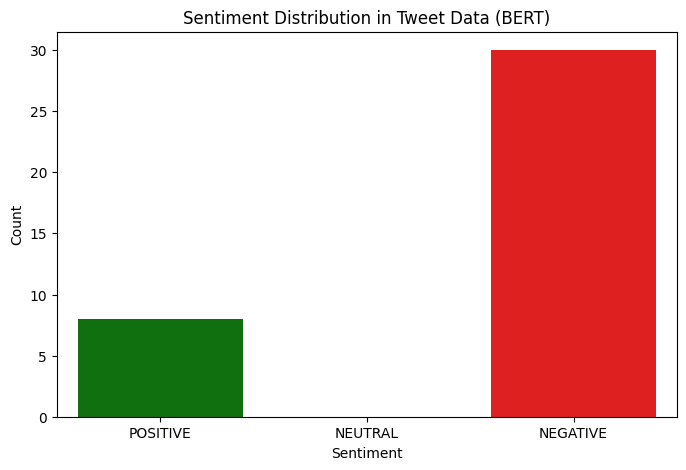

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading sentiment analysis resutls
forums_sentiment_path = "/content/forums_sentiment.csv"
tweets_sentiment_path = "/content/tweets_sentiment.csv"

forums_sentiment_df = pd.read_csv(forums_sentiment_path)
tweets_sentiment_df = pd.read_csv(tweets_sentiment_path)


sentiment_colors = {"POSITIVE": "green", "NEUTRAL": "gray", "NEGATIVE": "red"}

# bar chart for forum sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=forums_sentiment_df, x="BERT Sentiment", order=["POSITIVE", "NEUTRAL", "NEGATIVE"],
              palette=sentiment_colors)
plt.title("Sentiment Distribution in Forum Data (BERT)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# bar chart for tweet sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=tweets_sentiment_df, x="BERT Sentiment", order=["POSITIVE", "NEUTRAL", "NEGATIVE"],
              palette=sentiment_colors)
plt.title("Sentiment Distribution in Tweet Data (BERT)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


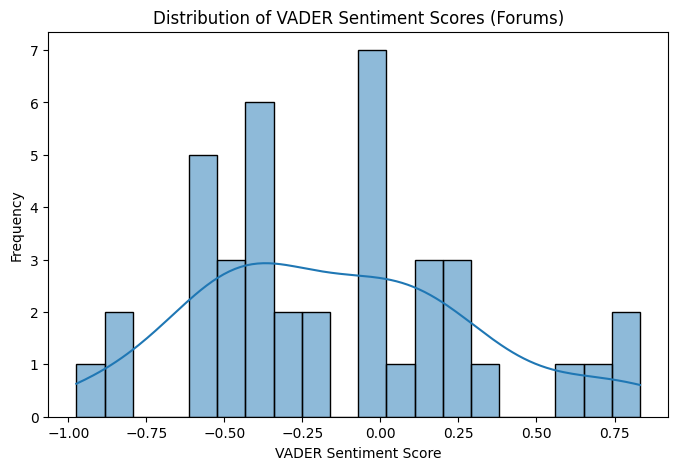

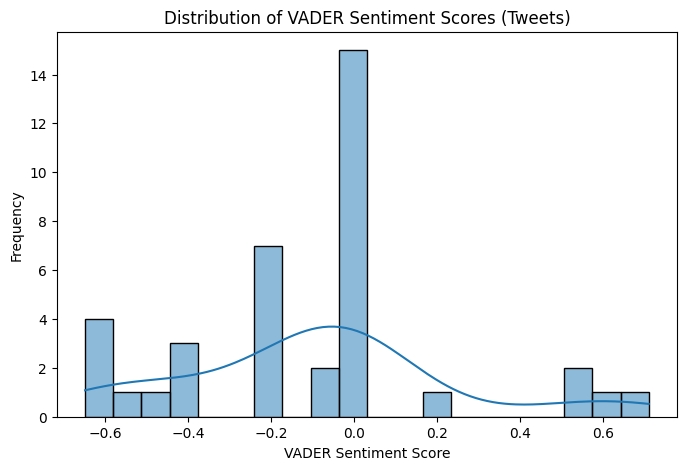

In [5]:
# histogram for VADER sentiment scores in forums with density curve
plt.figure(figsize=(8, 5))
sns.histplot(forums_sentiment_df["VADER Sentiment"], bins=20, kde=True)
plt.title("Distribution of VADER Sentiment Scores (Forums)")
plt.xlabel("VADER Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# histogram for VADER sentiment scores in tweets with density curve
plt.figure(figsize=(8, 5))
sns.histplot(tweets_sentiment_df["VADER Sentiment"], bins=20, kde=True)
plt.title("Distribution of VADER Sentiment Scores (Tweets)")
plt.xlabel("VADER Sentiment Score")
plt.ylabel("Frequency")
plt.show()



In [14]:
!pip install adjustText


<ipython-input-17-917c24a0d928>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm_r")  # Red for negative, blue for positive


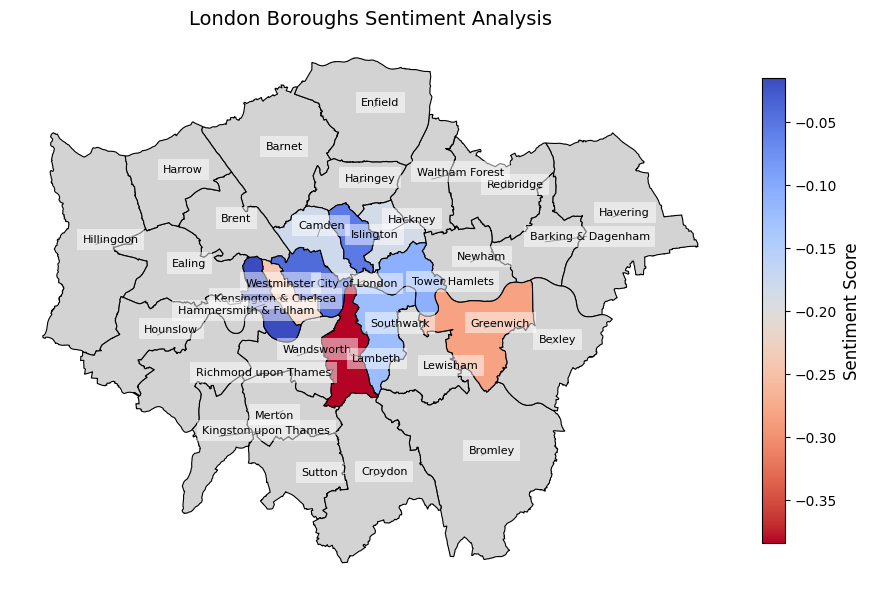

Map has been saved as london_boroughs_sentiment_map.png. Open this file to view the map.


In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from adjustText import adjust_text

# Load the GeoJSON file
geojson_path = "/content/London_Boroughs.geojson"
gdf = gpd.read_file(geojson_path)

# Load the sentiment data
forums_sentiment_path = "/content/forums_sentiment.csv"
forums_df = pd.read_csv(forums_sentiment_path)

# Standardize borough names in the sentiment dataset
forums_df["Location"] = forums_df["Location"].replace({
    "Kensington": "Kensington & Chelsea",
    "Hammersmith": "Hammersmith & Fulham"
})

# Aggregate sentiment scores by borough
forums_sentiment = forums_df.groupby("Location")["VADER Sentiment"].mean().reset_index()
forums_sentiment.rename(columns={"Location": "BOROUGH", "VADER Sentiment": "Sentiment Score"}, inplace=True)

# Merge sentiment scores with borough geometries
gdf = gdf.merge(forums_sentiment, on="BOROUGH", how="left")

# Normalize sentiment scores to a colormap
norm = mcolors.Normalize(vmin=gdf["Sentiment Score"].min(), vmax=gdf["Sentiment Score"].max())
cmap = cm.get_cmap("coolwarm_r")  # Red for negative, blue for positive
gdf["color"] = gdf["Sentiment Score"].apply(lambda x: mcolors.to_hex(cmap(norm(x))) if pd.notnull(x) else "#d3d3d3")

# Plot the boroughs with sentiment-based colors
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=gdf["color"], edgecolor="black", linewidth=0.8)
ax.set_title("London Boroughs Sentiment Analysis", fontsize=14)
ax.axis("off")

# Add labels for each borough with automatic adjustment
texts = []
for _, row in gdf.iterrows():
    if row.geometry.centroid is not None:
        text = plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row["BOROUGH"], fontsize=8,
                        ha='center', color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        texts.append(text)

# Adjust label positions to prevent overlap
adjust_text(texts, ax=ax, expand_points=(1.2, 1.2), arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("Sentiment Score", fontsize=12)

# Save the map
map_path = "london_boroughs_sentiment_map.png"
plt.savefig(map_path, dpi=300)
plt.show()

print(f"Map has been saved as {map_path}. Open this file to view the map.")


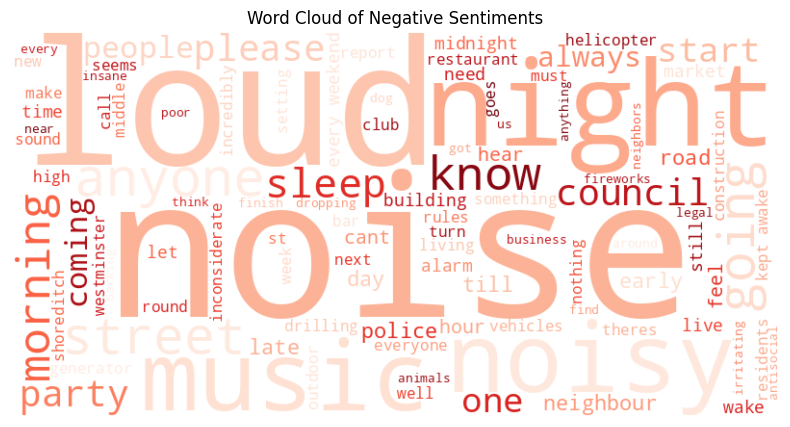

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter for negative sentiment texts
negative_forums_text = " ".join(forums_sentiment_df[forums_sentiment_df["BERT Sentiment"] == "NEGATIVE"]["Cleaned Text"].dropna())
negative_tweets_text = " ".join(tweets_sentiment_df[tweets_sentiment_df["BERT Sentiment"] == "NEGATIVE"]["Cleaned Text"].dropna())

# Combine text from both sources
combined_negative_text = negative_forums_text + " " + negative_tweets_text

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds", max_words=100).generate(combined_negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Negative Sentiments")
plt.show()
